In [26]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [27]:
df = pd.read_csv("D:\\ML-DataSets\\placement.csv")

In [28]:
df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


<Axes: xlabel='placement_exam_marks', ylabel='Density'>

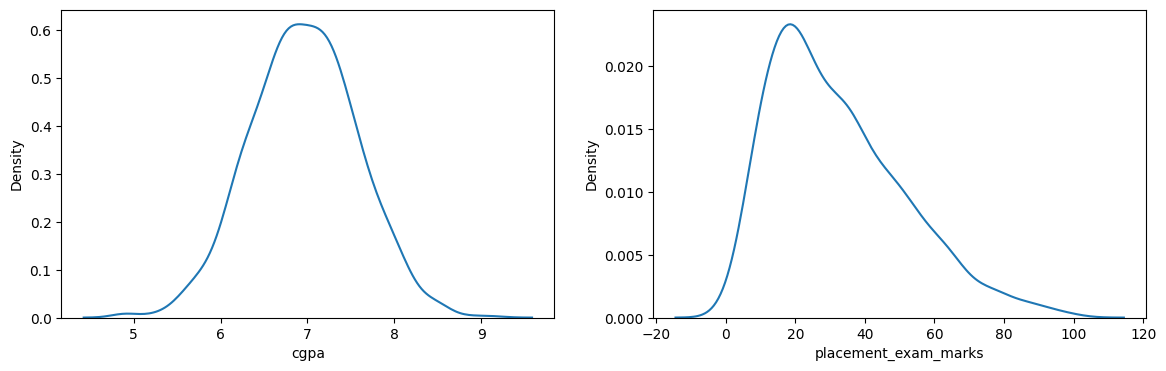

In [29]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.kdeplot(df['cgpa'])

plt.subplot(122)
sns.kdeplot(df['placement_exam_marks'])

<Axes: ylabel='placement_exam_marks'>

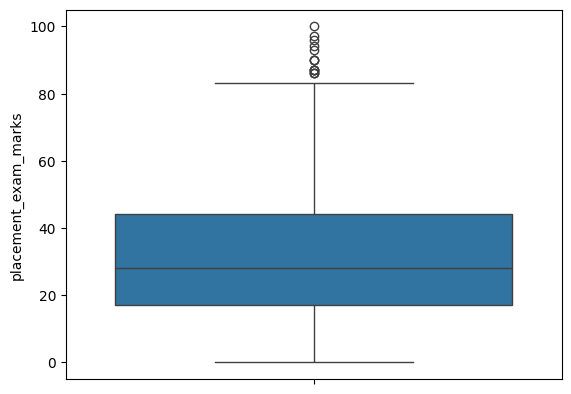

In [30]:
sns.boxplot(df['placement_exam_marks'])

In [31]:
df['placement_exam_marks'].describe()

count    1000.000000
mean       32.225000
std        19.130822
min         0.000000
25%        17.000000
50%        28.000000
75%        44.000000
max       100.000000
Name: placement_exam_marks, dtype: float64

In [32]:
q3 = df['placement_exam_marks'].quantile(0.75)
q1 = df['placement_exam_marks'].quantile(0.25)

In [33]:
q3

np.float64(44.0)

In [34]:
q1

np.float64(17.0)

In [35]:
iqr = q3- q1

In [36]:
iqr

np.float64(27.0)

In [37]:
upper_limit = q3 + 1.5*iqr
lower_limit = q1 - 1.5*iqr

In [38]:
upper_limit, lower_limit

(np.float64(84.5), np.float64(-23.5))

In [39]:
# Trimming

new_df = df[(df['placement_exam_marks'] < upper_limit) & (df['placement_exam_marks'] > lower_limit)]

In [40]:
new_df

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
998,8.62,46.0,1


In [41]:
new_df.shape

(985, 3)

In [42]:
# Capping

df['placement_exam_marks'] = np.where(
    df['placement_exam_marks'] > upper_limit,
    upper_limit,
    np.where(
        df['placement_exam_marks'] < lower_limit,
        lower_limit,
        df['placement_exam_marks']
    )
)

In [43]:
df

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
998,8.62,46.0,1


In [44]:
df.shape

(1000, 3)

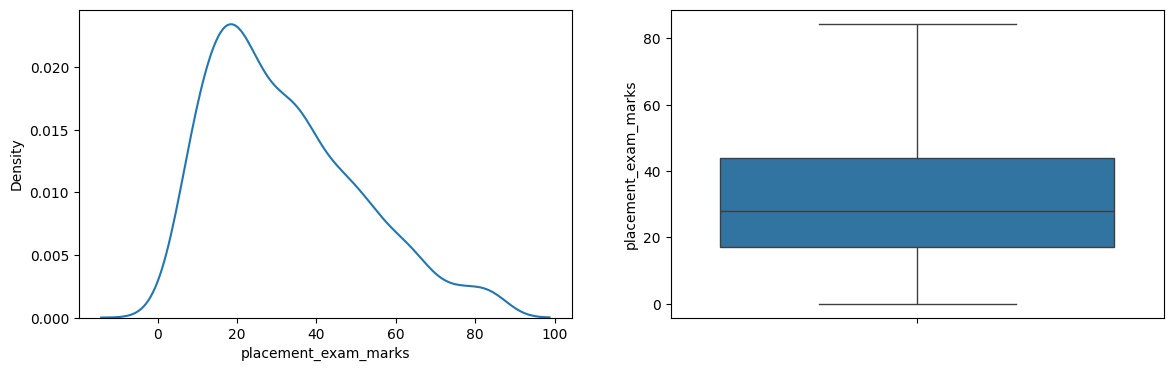

In [47]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.kdeplot(df['placement_exam_marks'])

plt.subplot(122)
sns.boxplot(df['placement_exam_marks'])

plt.show()